<a href="https://colab.research.google.com/github/freddy0218/2022_Intro_Python/blob/main/Exercises/W2_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 3: Replicating Plots using `Matplotlib` and `Numpy`

The goal here is to replicate the figures you see as closely as possible.

In order to get some data, you will have to run the code in the cells below. There is no need to focus on how this code exactly works. In the end, it will give you some `numpy` arrays, which you will use in your plots. 

This exercise should be done using **only `numpy` and `matplotlib`**.

## Part I: Line and Contour Plots to Visualize Global Temperature Data
The temperature data are from the [NCEP/NCAR atmospheric reanalysis 1](https://psl.noaa.gov/data/gridded/data.ncep.reanalysis.html).

In [ ]:
# We'll need to load the data from the UNIL sharepoint using pooch, so let's
# import the library
import pooch
import numpy as np
import matplotlib.pyplot as plt

# In order to keep our code concise and readable, we'll use a variable that 
# stores the common part of the URL where the data is hosted. Then, we'll store
# the full URL for each file in its own variable
base_url = 'https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/'
lon_url =  f'{base_url}EQtSkmHdXlZAuZcDljeHXuMBIVGfXP4lkR56RX6vuCDh1Q?download=1'
lat_url =  f'{base_url}EbMAwn26etZPjxw4F3akRt8BmPef3PMQPn751e6tF0Xi-Q?download=1'
temp_url = f'{base_url}EfUOMGrJNtVMgJUtfP9137sB9d64M_osBRPa0iQRSCHKGg?download=1'

# Let's go ahead and cache each file
lon_filename  = pooch.retrieve(lon_url, 
                               known_hash='eaf54b88dd89279d3034da17fe8470dc2c841bf9fa89b2aa741dacff9c326cdb'
                               )

lat_filename  = pooch.retrieve(lat_url, 
                               known_hash='af1f438080460e1fca4583b2ec19b44285a3d3776e4d21b8da9b6e162906c88a'
                               )
temp_filename = pooch.retrieve(temp_url, 
                               known_hash='e040ca257334708b43e86398e09a5669fcf051179ecf5dcd278f758d67beed20'
                               )

# And then load each file into a numpy array. You can now use these variables
# to continue with the exercise :)
lon = np.load(lon_filename)
lat = np.load(lat_filename)
temp = np.load(temp_filename)

Below is the figure to replicate using the `numpy` variables `temp`, `lon`, and `lat`.

Hint 1: Zonal-mean is synonymous with longitudinal-mean, i.e. the mean must be taken along the `axis` corresponding to `lon`.

Hint 2: To create subplots of different sizes, consider reading the [`plt.subplots` documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

Hint 3: For the left subplot, check out the [2D Plotting Methods section](#2D_Plotting_Methods).

Hint 4: For the right subplot, check out the [Label, Ticks, and Gridlines subsection](#Label).

Hint 5: Don't spend too too much time making your figure perfect as there is still a lot of ground to cover in the next notebooks 😀

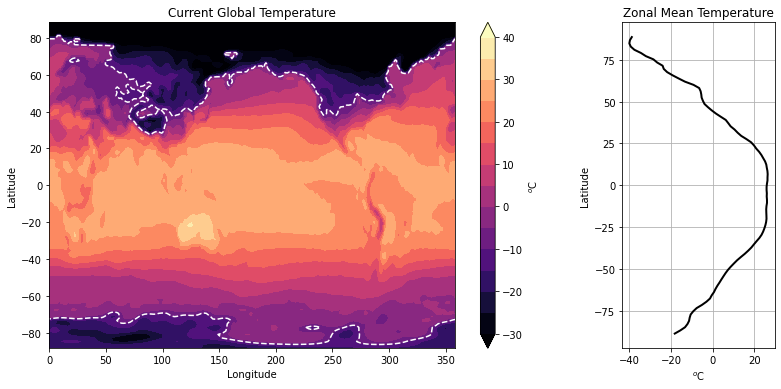

In [ ]:
# Replicate this figure
# Temperature values are originally in Kelvin units -> Convert to degree celsius by subtracting 273.15
fig, (__,__) = plt.subplots(__, __, figsize=(___,___),gridspec_kw={'width_ratios': [5, 1.5]})
ctemp = __.________(___,__,_________,cmap='magma',levels=np.linspace(-30,40,15),extend='both')
___._________(___,___,_________,colors='w',levels=[-10],extend='both')
___.set_xlabel('________')
___.set_ylabel('________')
___.set_title('______________________')
___._______(_____,ax=___,____='$^o$C')

___.____(np.__________(___________,axis=_),lat,lw=2,c='k')
___.set_xlabel(r'$^{o}$C')
___.set_ylabel(r'Latitude')
___.set_title('Zonal Mean Temperature')
plt.____()
plt.show()

## Part II: Scatter Plots to Visualize Earthquake Data
Here, we will make a map plot of earthquakes from a USGS catalog of historic large earthquakes. Color the earthquakes by `log10(depth)` and adjust the marker size to be `magnitude`

In [ ]:
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EW1bnM3elHpAtjb1KtiEw0wB9Pl5w_FwrCvVRlnilXHCtg?download=1",
    known_hash='22b9f7045bf90fb99e14b95b24c81da3c52a0b4c79acf95d72fbe3a257001dbb',
    processor=pooch.Unzip()
)[0]

earthquakes = np.genfromtxt(fname, delimiter='\t')
depth = earthquakes[:, 8]
magnitude = earthquakes[:, 9]
latitude = earthquakes[:, 20]
longitude = earthquakes[:, 21]

Below is the figure to replicate using the `numpy` variables `earthquake`, `depth`, `magnitude`, `latitude`, and `longitude`.

Hint: Check out the [Scatter Plots subsection](#Scatter) and consider reading the documentation for [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) and [`plt.colorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html). 

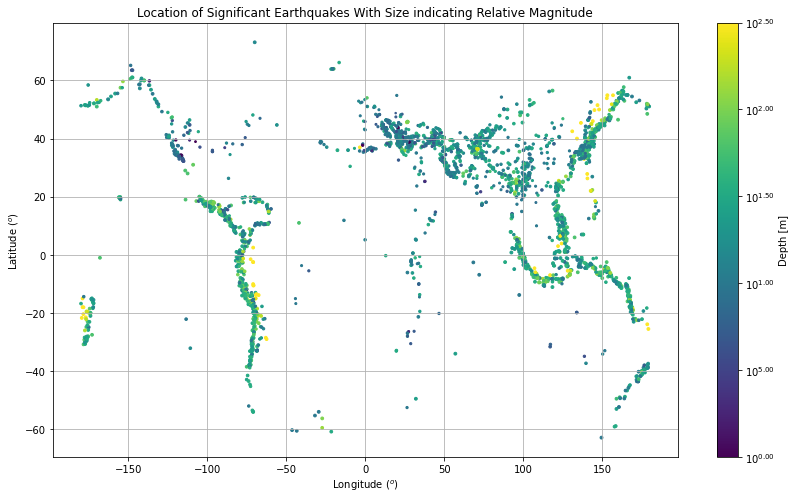

In [ ]:
# This is the function to the set the ticks in the colorbar to be in scientific notations. Don't change any thing in here.
import matplotlib.ticker as ticker
def fmt(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(a)

In [ ]:
# Replicate the figure here
___,___ = _____._________(_, _, figsize=(__,__))
ctemp=________._______(_______,_______,s=________,c=np._____(_____),marker='o',cmap='viridis',vmin=0,vmax=2.5)
___.________('__________')
___.________('__________')
plt.grid()
___._________(____,ax____,label=_________,format=ticker.FuncFormatter(fmt))
___.____('_________________________')
plt.show()

# Exercise 4: Cartopy

The goal of this exercise (congratulations for making it that far!!) is to replicate the figures you see as closely as possible.

## Part I: Antarctic Sea Ice

**Q1) Download the file below and use it to plot the concentration of Antarctic Sea Ice.** 

Hint: Explore the file contents in order to determine the correct projection.

In [1]:
!pip install --no-binary 'shapely==1.6.4' 'shapely==1.6.4' --force
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.6.4-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.6.4
    Uninstalling Shapely-1.6.4:
      Successfully uninstalled Shapely-1.6.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pooch
import cartopy
import cartopy.crs as ccrs
import xarray as xr
######################################################################################################################################################
# Download Sea Ice files
url1 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EREWA38Rs-FFslQd4yKZBAsBF8m9yLzeJKEAN5gSz7LLFw?download=1"
fname1 = pooch.retrieve(url1, known_hash='1ff50bca1e6249a9b2fcd9d9466e31bdb5be650243f99c7319ab2ce625b87ce7')
url2 = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/Ea_2umrDTkhCrN--th4nuokBMcnVlxGshiyUq2eSpvhlTQ?download=1"
fname2 = pooch.retrieve(url2, known_hash='309418969ad09f42b8104589bcb86de4ed353a5742fef9385baec174c7d55e66')
######################################################################################################################################################
# Run these as is. We are reading the sea ice concentration values from our files
seaice1,seaice2 = xr.open_dataset(fname1),xr.open_dataset(fname2)
var_toplot1,var_toplot2 = seaice1['seaice_conc_cdr'],seaice2['seaice_conc_cdr']

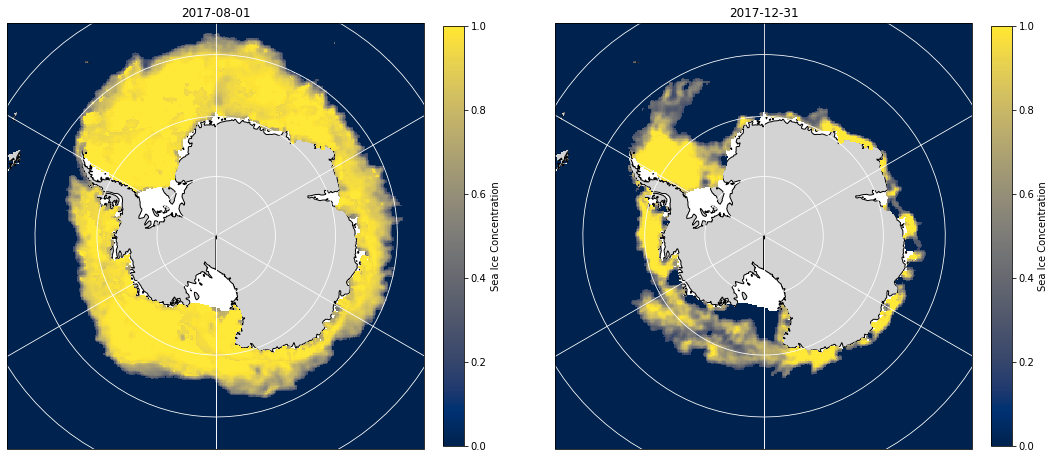

In [4]:
import matplotlib.pyplot as plt
#import cartopy.feature as cfeature
import numpy as np

fig,ax = plt.subplots(1,2,figsize=(18, 12),subplot_kw={'projection': ccrs.SouthPolarStereo()})
# The rest doesn't change:
ax[0].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())

######################################################################################################################################################
#
ax[0].add_feature(cartopy.feature.LAND, edgecolor='black',facecolor='lightgray')
ax[0].add_feature(cartopy.feature.LAKES, edgecolor='black')
ax[0].add_feature(cartopy.feature.RIVERS)
ax[0].gridlines(lw=2,ls='-',color='w')

cmap = ax[0].pcolormesh(seaice1.longitude, seaice1.latitude, np.ma.masked_greater(var_toplot1[0,...],1), transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='cividis')
plt.colorbar(cmap,ax=ax[0],fraction=0.046, pad=0.04,label='Sea Ice Concentration')
ax[0].set_title('2017-08-01')

ax[1].set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
#ax.add_feature(cartopy.feature.OCEAN)
ax[1].add_feature(cartopy.feature.LAND, edgecolor='black',facecolor='lightgray')
ax[1].add_feature(cartopy.feature.LAKES, edgecolor='black')
ax[1].add_feature(cartopy.feature.RIVERS)
ax[1].gridlines(lw=2,ls='-',color='w')

cmap = ax[1].pcolormesh(seaice2.longitude, seaice2.latitude, np.ma.masked_greater(var_toplot2[0,...],1), transform=ccrs.PlateCarree(),vmin=0,vmax=1,cmap='cividis')
plt.colorbar(cmap,ax=ax[1],label='Sea Ice Concentration',fraction=0.046, pad=0.04)
ax[1].set_title('2017-12-31')
plt.show()

In [22]:
import pandas as pd
fname = pooch.retrieve(
    "https://unils-my.sharepoint.com/:x:/g/personal/tom_beucler_unil_ch/Ea9h1j2_wYpEtuX5waZZWpsBt2zh3lvGUBFisvA8dFG5Eg?download=1",
    known_hash='84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1')
usgs_2014 = pd.read_csv(fname)

SHA256 hash of downloaded file: 84d455fb96dc8f782fba4b5fbe56cb8970cab678f07c766fcba1b1c4674de1b1
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [29]:
usgs_2014_nonan = usgs_2014.dropna()
usgs_2014_large = usgs_2014_nonan[usgs_2014_nonan['mag']>4]

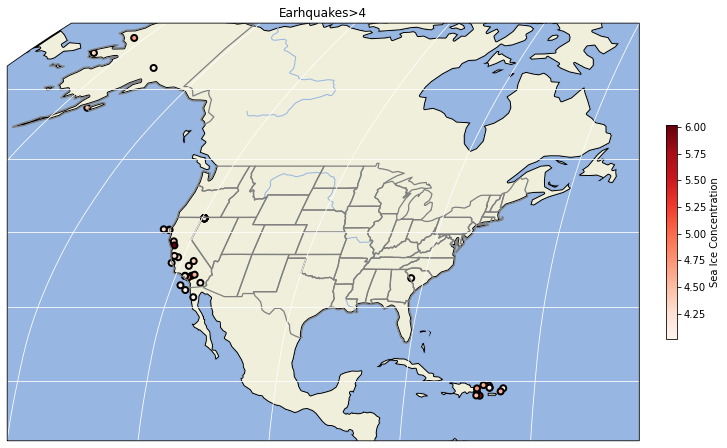

In [50]:
fig,ax = plt.subplots(1,1,figsize=(12, 12),subplot_kw={'projection': ccrs.Robinson()})
# The rest doesn't change:
ax.set_extent([-140, -60, 12,70], ccrs.PlateCarree())

#ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black',linewidths=3)
#ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.STATES,edgecolor='gray',linewidth=1.25)
ax.gridlines(lw=2,ls='-',color='w')

amp = ax.scatter(usgs_2014_large['longitude'],usgs_2014_large['latitude'],c=usgs_2014_large['mag'],marker='o',cmap='Reds',edgecolors='k',linewidths=2, transform=ccrs.PlateCarree())
plt.colorbar(amp,ax=ax,fraction=0.016, pad=0.04,label='Sea Ice Concentration')
ax.set_title('Earhquakes>4')
plt.show()

In [66]:
! ls /usr/local/lib/python3.7/dist-packages/cartopy/data/raster/natural_earth

50-natural-earth-1-downsampled.png  images.json


In [68]:
cartopy.read_user_background_images()

AttributeError: ignored

In [63]:
import os

In [64]:
os.getenv('CARTOPY_USER_BACKGROUNDS')

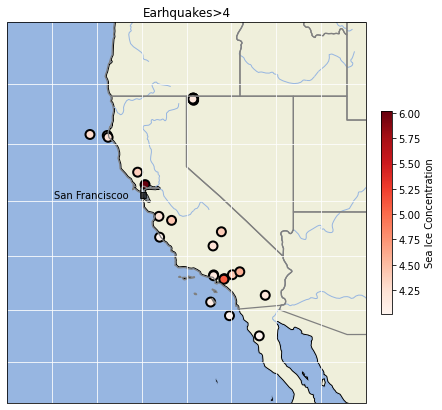

In [89]:
fig,ax = plt.subplots(1,1,figsize=(7, 7),subplot_kw={'projection': ccrs.Mercator()})
# The rest doesn't change:
ax.set_extent([-130, -110, 28,45], ccrs.PlateCarree())
#ax.background_img(name='ETOPO',resolution='high')
#ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND, edgecolor='black',linewidths=3)
#ax.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.STATES,edgecolor='gray',linewidth=1.25)
ax.gridlines(lw=2,ls='-',color='w')

amp = ax.scatter(usgs_2014_large['longitude'],usgs_2014_large['latitude'],c=usgs_2014_large['mag'],s=80,marker='o',cmap='Reds',edgecolors='k',linewidths=2, transform=ccrs.PlateCarree())
ax.text(-123.2194, 37.7749, 'San Franciscoo',verticalalignment='center', horizontalalignment='right',transform=ccrs.PlateCarree())
ax.plot(-122.4194, 37.7749, marker='s',markersize=6, color='k',alpha=0.7, transform=ccrs.Geodetic())
plt.colorbar(amp,ax=ax,fraction=0.026, pad=0.04,label='Sea Ice Concentration')
ax.set_title('Earhquakes>4')
plt.show()